In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

In [62]:
def convolution(img, kernel):
    #flip kernel for convolution
    kernel_r = np.flipud(np.fliplr(kernel))
    
    #find the amount of padding needed for each side of the image
    padx = kernel.shape[0]
    pady = kernel.shape[1]
    
    #making frame for new padded image
    image_pad = np.zeros((img.shape[0] + padx - 1,img.shape[1]+pady - 1, img.shape[2])) 
    
    #leave the padded area and copy over the other information.
    image_pad[round((padx-1)/2):round(-(padx-1)/2), round((pady-1)/2):round(-(pady-1)/2),0:] = img[0:,0:,0:] 
    
    #make an empty frame for the output
    img_out = np.zeros_like(img)
    
    #if image is 3-D do three layers of convolution on X, Y, Z
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for z in range(img.shape[2]): 
                #make sure the sum value is within range of 0 - 255
                img_out[x,y,z] = np.clip((image_pad[x:x+padx, y:y+pady,z]*kernel_r).sum(),0,255 )

    return img_out




In [63]:
def correlation(img, kernel):
    
    #find the amount of padding needed for each side of the image
    padx = kernel.shape[0]
    pady = kernel.shape[1]

    #making frame for new padded image
    image_pad = np.zeros((img.shape[0] + padx - 1,img.shape[1]+pady - 1, img.shape[2])) 
    #leave the padded area and copy over the other information.
    image_pad[round((padx-1)/2):round(-(padx-1)/2), round((pady-1)/2):round(-(pady-1)/2),0:] = img[0:,0:,0:] 
    img_out = np.zeros_like(img)
    #if image is 3-D do three layers of convolution on X, Y, Z
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for z in range(img.shape[2]): 
                #make sure the sum value is within range of 0 - 255
                img_out[x,y,z] = np.clip((image_pad[x:x+padx, y:y+pady,z]*kernel).sum(),0,255 )

    return img_out


In [64]:
def median_filter(img, kernel_size):
    
    padx = kernel_size
    pady = kernel_size
    #if image is 3-D do three layers of convolution?
    image_pad = np.zeros((img.shape[0] + padx - 1,img.shape[1]+pady - 1, img.shape[2])) #making frame for new padded image
    
    image_pad[round((padx-1)/2):round(-(padx-1)/2), round((pady-1)/2):round(-(pady-1)/2),0:] = img[0:,0:,0:] #leave the padded area and copy over the other information.

    img_out = np.zeros_like(img)
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            for z in range(img.shape[2]): 
                #make sure the image is within range of 0 - 255
                tempArr = image_pad[x:x+padx, y:y+pady,z]
                tempArr = np.sort(tempArr.flatten())
                
                if tempArr.size % 2 == 0:
                    i = int(tempArr.size/2)
                    j = i-1
                    img_out[x,y,z] = (tempArr[i] + tempArr[j])/2
                else:   
                    i = int((tempArr.size-1)/2)
                    img_out[x,y,z] = tempArr[i]
    return img_out

    
    
    
    
    

In [65]:
def gaussian(sig, x, y):
    return ( 1./(2.*math.pi*(sig**2))*np.exp(-(x**2 + y**2)/(2*sig**2)) )

def Gaussian_kernel(sig, x_dim, y_dim):
    
    gaussian_kernel = np.zeros(shape=(x_dim, y_dim))
    for x in range(-round((x_dim-1)/2), round((x_dim+1)/2)):
        for y in range(-round((y_dim-1)/2), round((y_dim+1)/2)):
            gaussian_kernel[x+round((x_dim-1)/2)][y+ round((y_dim-1)/2)] = gaussian(sig,x,y)
            
    return gaussian_kernel

def Mean_kernel(size):
    return (1/size**2)*np.ones(shape=(size,size))

In [66]:
###########################DEFAULT KERNELS#####################
# mean_kernel_3x3
# mean_kernel_5x5
# org_kernel_3x3
# org_kernel_5x5
# sharpening_kernel_3x3
# sharpening_kernel_5x5
# gaussian_kernel_3x3      0.5 sigma
# gaussian_kernel_5x5      1.0 sigma
##############################################################

mean_kernel_3x3 = Mean_kernel(3)

mean_kernel_5x5 = Mean_kernel(5)


org_kernel_3x3 = np.array([
    [0,0,0],
    [0,2,0],
    [0,0,0]
])
org_kernel_5x5 = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

sharpening_kernel_3x3 = org_kernel_3x3 - mean_kernel_3x3

sharpening_kernel_5x5 = org_kernel_5x5 - mean_kernel_5x5

gaussian_kernel_3x3 = Gaussian_kernel(0.5, 3,3)

gaussian_kernel_5x5 = Gaussian_kernel(1, 5,5)

Original Image...


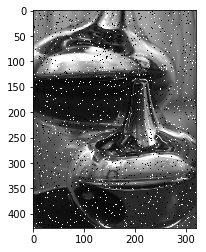

3x3 Mean filter applied through CONVOLUTION...


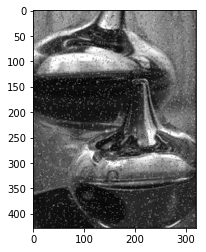

3x3 Mean filter applied through CORRELATION...


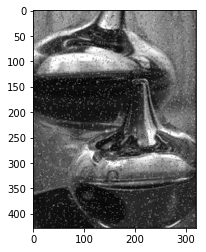

5x5 Mean filter applied through CONVOLUTION...


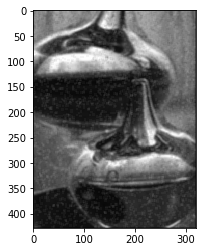

5x5 Mean filter applied through CORRELATION...


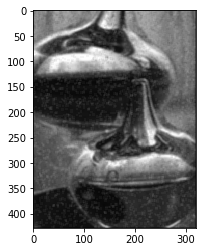

3x3 Median filter applied...


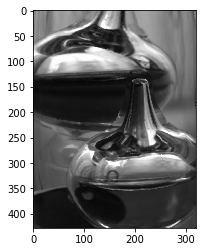

5x5 Median filter applied...


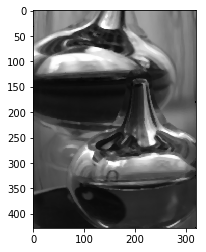

In [67]:
img_in = cv2.imread('art.png')
#img_in= cv2.imread('lena.png')
#img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)

print("Original Image...")
plt.imshow(img_in)
plt.show()

####################DEFAULT KERNELS USED######################
# mean_kernel_3x3
# mean_kernel_5x5
# median_kernel_3x3
# median_kernel_5x5
##############################################################

print("3x3 Mean filter applied through CONVOLUTION...")
img1= convolution(img_in, mean_kernel_3x3)
plt.imshow(img1)
plt.show()

print("3x3 Mean filter applied through CORRELATION...")
img2= correlation(img_in, mean_kernel_3x3)
plt.imshow(img2)
plt.show()

print("5x5 Mean filter applied through CONVOLUTION...")
img3= convolution(img_in, mean_kernel_5x5)
plt.imshow(img3)
plt.show()

print("5x5 Mean filter applied through CORRELATION...")
img4= correlation(img_in, mean_kernel_5x5)
plt.imshow(img4)
plt.show()

print("3x3 Median filter applied...")
img5 = median_filter(img_in, 3)
plt.imshow(img5)
plt.show()

print("5x5 Median filter applied...")
img6 = median_filter(img_in, 5)
plt.imshow(img6)
plt.show()

Original Image...


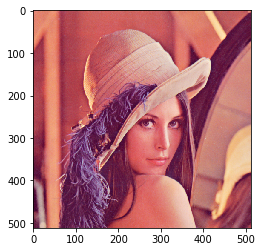

3x3 Mean filter applied...


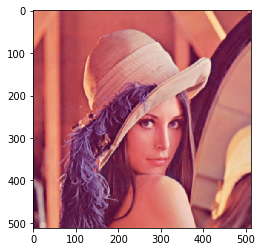

5x5 Mean filter applied...


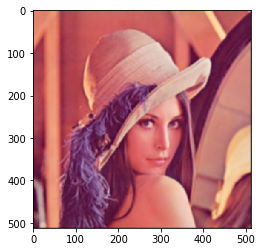

3x3 Gaussian filter applied (sig=0.5)...


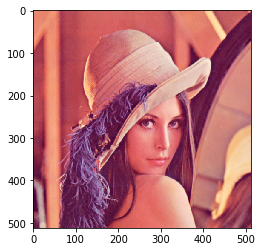

5x5 Gaussian filter applied (sig=1)...


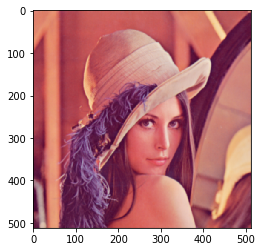

3x3 Sharpening filter applied...


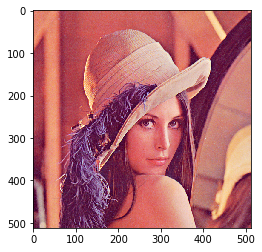

5x5 Sharpening filter applied...


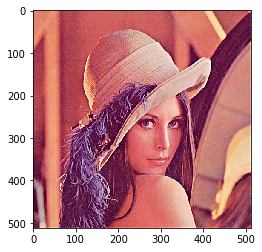

In [68]:
img_in1= cv2.imread('lena.png')
img_in1= cv2.cvtColor(img_in1, cv2.COLOR_BGR2RGB)

print("Original Image...")
plt.imshow(img_in1)
plt.show()

####################DEFAULT KERNELS USED######################
# mean_kernel_3x3
# mean_kernel_5x5
# gaussian_kernel_3x3      0.5 sigma
# gaussian_kernel_5x5      1.0 sigma
# sharpening_kernel_3x3
# sharpening_kernel_5x5
#############################################################


print("3x3 Mean filter applied...")
img11= convolution(img_in1, mean_kernel_3x3)
plt.imshow(img11)
plt.show()

print("5x5 Mean filter applied...")
img12= convolution(img_in1, mean_kernel_5x5)
plt.imshow(img12)
plt.show()

print("3x3 Gaussian filter applied (sig=0.5)...")
img13= convolution(img_in1, gaussian_kernel_3x3)
plt.imshow(img13)
plt.show()

print("5x5 Gaussian filter applied (sig=1)...")
img14= convolution(img_in1, gaussian_kernel_5x5)
plt.imshow(img14)
plt.show()

print("3x3 Sharpening filter applied...")
img15 = convolution(img_in1,sharpening_kernel_3x3)
plt.imshow(img15)
plt.show()

print("5x5 Sharpening filter applied...")
img16 = convolution(img_in1,sharpening_kernel_5x5)
plt.imshow(img16)
plt.show()


In [69]:
img11= cv2.cvtColor(img11, cv2.COLOR_RGB2BGR)
img12= cv2.cvtColor(img12, cv2.COLOR_RGB2BGR)
img13= cv2.cvtColor(img13, cv2.COLOR_RGB2BGR)
img14= cv2.cvtColor(img14, cv2.COLOR_RGB2BGR)
img15= cv2.cvtColor(img15, cv2.COLOR_RGB2BGR)
img16= cv2.cvtColor(img16, cv2.COLOR_RGB2BGR)

cv2.imwrite("art_conv_mean3.png",img1)
cv2.imwrite("art_corr_mean3.png",img2)
cv2.imwrite("art_conv_mean5.png",img3)
cv2.imwrite("art_corr_mean5.png",img4)
cv2.imwrite("art_median3.png",img5)
cv2.imwrite("art_median5.png",img6)

cv2.imwrite("lena_mean3.png",img11)
cv2.imwrite("lena_mean5.png",img12)
cv2.imwrite("lena_gauss3.png",img13)
cv2.imwrite("lena_gauss5.png",img14)
cv2.imwrite("lena_sharp3.png",img15)
cv2.imwrite("lena_sharp5.png",img16)

True